# Principal Component Analysis (PCA)

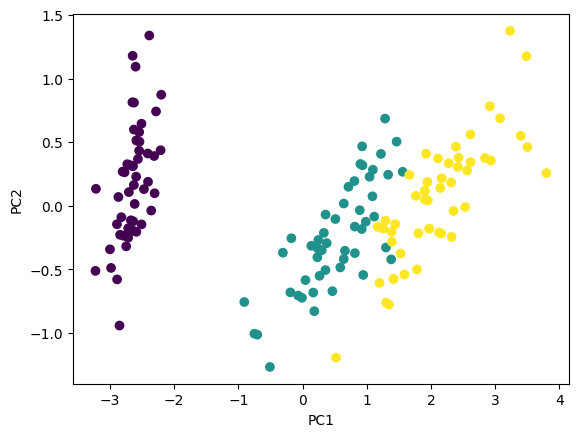

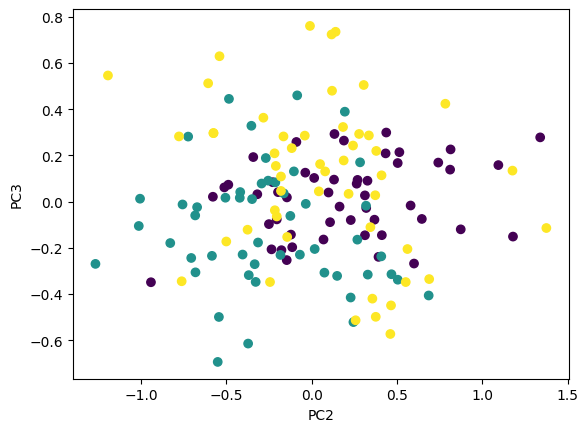

In [11]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()

# Let's say we want to reduce the data to two dimensions
pca = PCA(n_components=3)

# Fit and transform the data
iris_pca = pca.fit_transform(iris.data)

# Now we can plot the first two principal components
plt.scatter(iris_pca[:,0], iris_pca[:,1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Now we can plot the 2 and 3 principal components
plt.scatter(iris_pca[:,1], iris_pca[:,2], c=iris.target)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

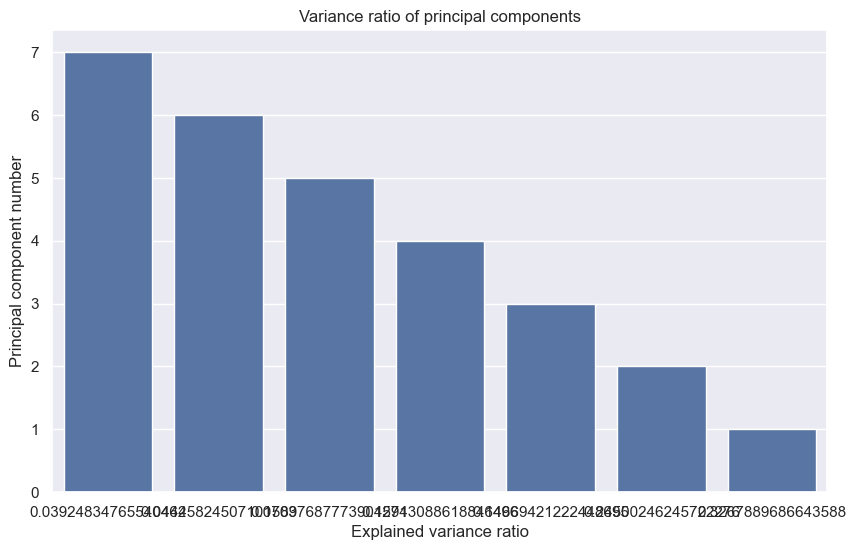

   total_bill       tip       sex    smoker       day      time      size
0    0.577289  0.531650  0.189111  0.036649 -0.156579 -0.281249  0.493317
1    0.133642  0.178333 -0.152571 -0.335732  0.660434  0.556479  0.261729
2    0.164816  0.159316 -0.588523  0.724260 -0.047053  0.266919 -0.055523
3    0.061756 -0.010375  0.762364  0.501763  0.229846  0.297170 -0.148236
4   -0.058183 -0.637807  0.000506  0.212334  0.003218 -0.004329  0.738039
5    0.378659 -0.274214 -0.115541  0.111732  0.606759 -0.572115 -0.245190
6    0.686390 -0.421978  0.007162 -0.228151 -0.340735  0.352618 -0.241370


In [31]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Load the data
df = sns.load_dataset('tips')

# preprocessing
# encoding
le = LabelEncoder()
cat_variables = df.select_dtypes(include='category').columns

# for loop to apply le
for var in cat_variables:
    df[var] = le.fit_transform(df[var])

# standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# apply pca
pca = PCA()

# fit and transform
pca_df = pca.fit_transform(df_scaled)

# plot the variance ratio
plt.figure(figsize=(10,6))
sns.barplot(x=pca.explained_variance_ratio_, y=np.arange(1, len(pca.explained_variance_ratio_)+1))
plt.xlabel('Explained variance ratio')
plt.ylabel('Principal component number')
plt.title('Variance ratio of principal components')
plt.show()

# a dataframe to show loadings
pca_df_loadings = pd.DataFrame(pca.components_, columns=df.columns)
print(pca_df_loadings)

<Axes: xlabel='PC1', ylabel='PC2'>

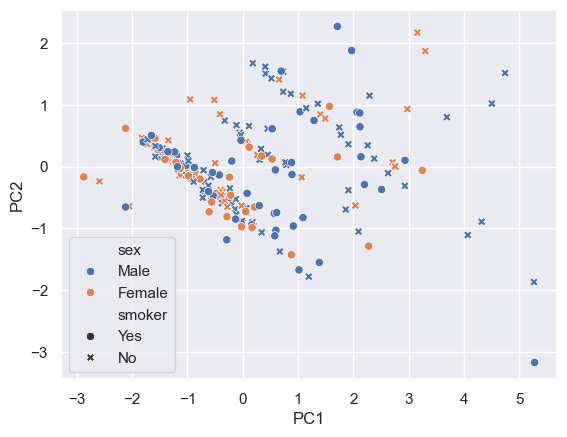

In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

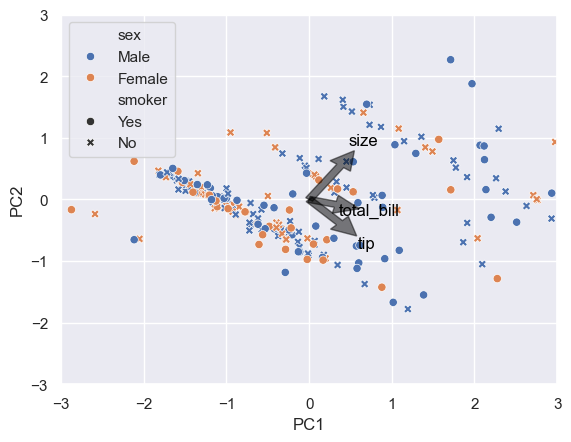

In [33]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
tips['PC1'] = X_pca[:, 0]
tips['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=tips, hue='sex', style='smoker')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    plt.arrow(0, 0, feature[0], feature[1], color='black', alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(feature[0]*1.2, feature[1]*1.2, X.columns[i], color='black', ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-3, 3)
plt.ylim(-3, 3)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

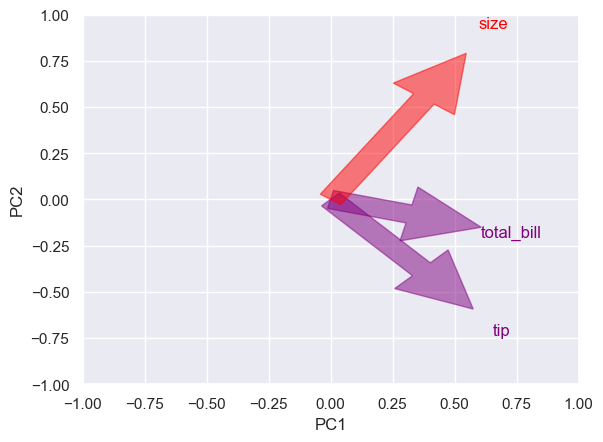

In [34]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the tips dataset from seaborn
tips = sns.load_dataset('tips')

# Prepare the data for PCA
X = tips[['total_bill', 'tip', 'size']]
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

# Diamonds DataSet PCA

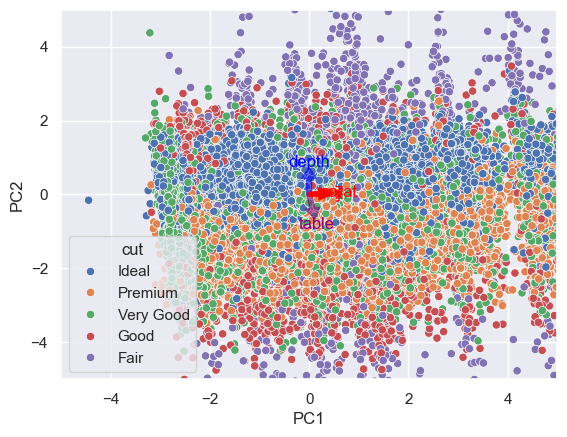

In [35]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Transform the data into the principal component space
X_pca = pca.transform(X)

# Add the principal components to the dataset
diamonds['PC1'] = X_pca[:, 0]
diamonds['PC2'] = X_pca[:, 1]

# Plot the data in the principal component space
sns.scatterplot(x='PC1', y='PC2', data=diamonds, hue='cut')

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-5, 5)
plt.ylim(-5, 5)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

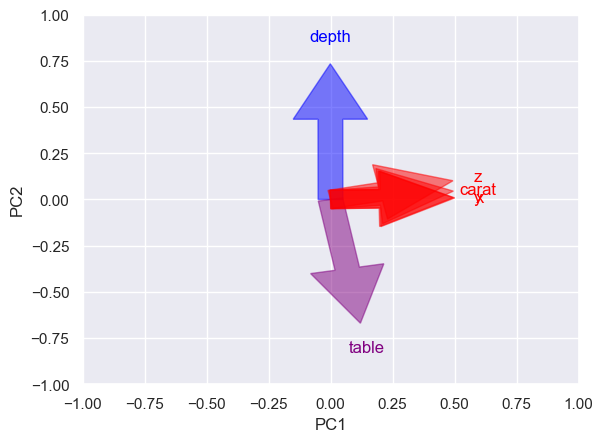

In [36]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Add arrows indicating the direction and strength of each original feature in the principal component space
features = pca.components_.T
for i, feature in enumerate(features):
    x, y = feature
    color = 'red' if x > 0 and y > 0 else 'green' if x < 0 and y < 0 else 'blue' if x < 0 and y > 0 else 'purple'
    plt.arrow(0, 0, x, y, color=color, alpha=0.5, width=0.1,
              head_width=0.3, head_length=0.3, length_includes_head=True)
    plt.text(x*1.2, y*1.2, X.columns[i], color=color, ha='center', va='center', fontsize=12)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.show()

            PC1       PC2
carat  0.495367  0.045130
depth -0.000682  0.734082
table  0.120581 -0.669827
x      0.500910  0.008204
y      0.495218  0.009657
z      0.493882  0.101283


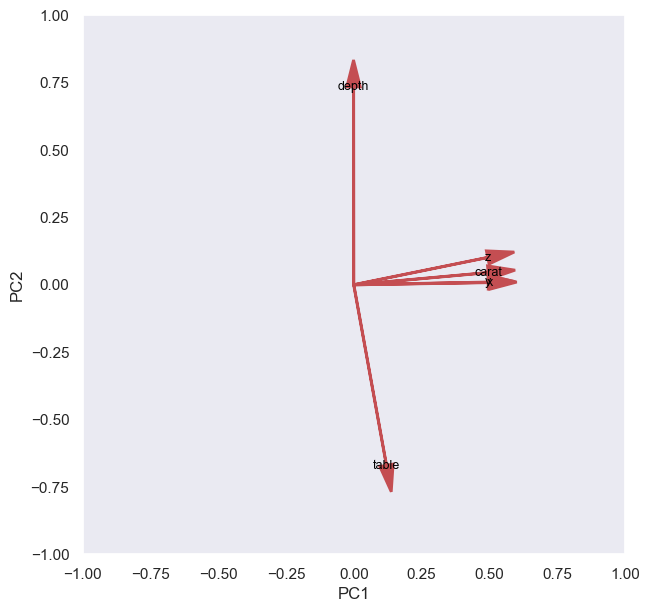

In [37]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with two components
pca = PCA(n_components=2)
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
print(loadings)

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()

            PC1       PC2       PC3       PC4       PC5       PC6
carat  0.495367  0.045130 -0.027908  0.789965 -0.160215 -0.319502
depth -0.000682  0.734082  0.671001 -0.014030 -0.088358  0.053638
table  0.120581 -0.669827  0.732523 -0.013456 -0.002961 -0.003431
x      0.500910  0.008204 -0.069979  0.040759  0.048632  0.860290
y      0.495218  0.009657 -0.086227 -0.537622 -0.635140 -0.234074
z      0.493882  0.101283  0.007509 -0.291338  0.748831 -0.316450


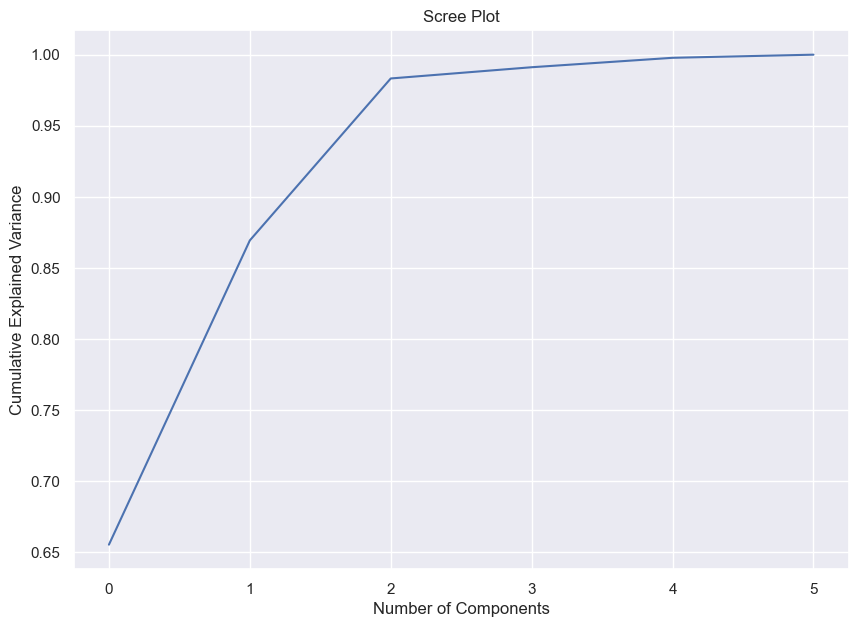

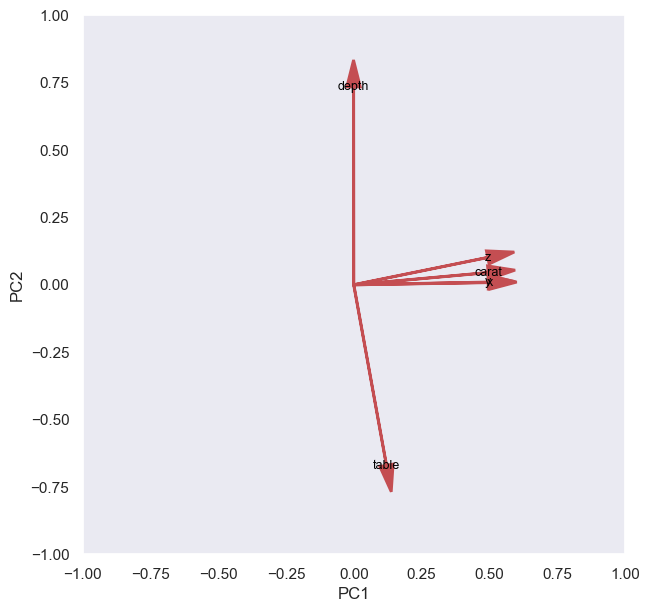

In [38]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the data
X = (X - X.mean()) / X.std()

# Perform PCA with all components
pca = PCA()
pca.fit(X)

# Create a DataFrame to show the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)
print(loadings)

# Plot the explained variance (Scree Plot)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

# Add arrows indicating the direction and strength of each original feature in the principal component space
plt.figure(figsize=(7,7))
for i, v in enumerate(pca.components_.T):
    plt.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.1, linewidth=2, fc='r', ec='r')
    plt.text(v[0], v[1], X.columns[i], color='black', ha='center', va='center', fontsize=9)

# Set the axis limits
plt.xlim(-1, 1)
plt.ylim(-1, 1)

# Set the axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')

# Show the plot
plt.grid()
plt.show()

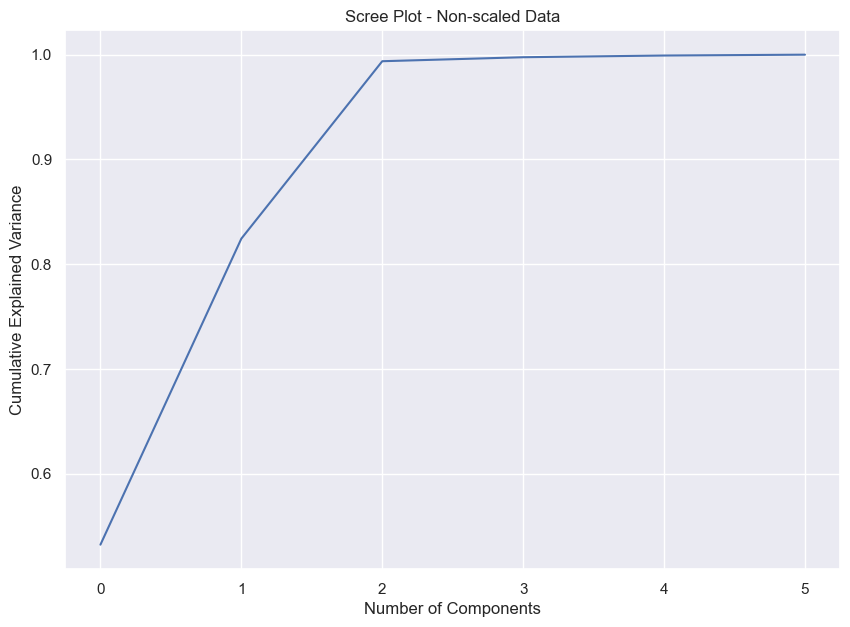

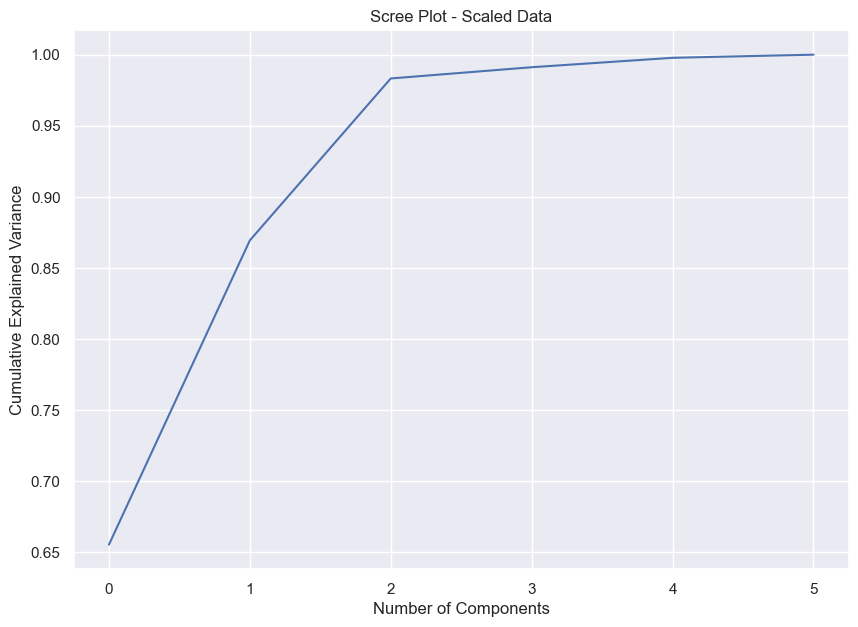

In [39]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the diamonds dataset from seaborn
diamonds = sns.load_dataset('diamonds')

# Prepare the data for PCA
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Perform PCA on non-scaled data
pca_non_scaled = PCA()
pca_non_scaled.fit(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA on scaled data
pca_scaled = PCA()
pca_scaled.fit(X_scaled)

# Plot the explained variance (Scree Plot) for non-scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_non_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Non-scaled Data')
plt.grid(True)
plt.show()

# Plot the explained variance (Scree Plot) for scaled data
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_scaled.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot - Scaled Data')
plt.grid(True)
plt.show()